機械学習特論 第5回 分類 SVM 手書き文字の分類

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import svm
from sklearn import metrics
import matplotlib.pyplot as plt

In [2]:
# 手書き文字のデータセットをダウンロードして、実験用データを準備
from sklearn.datasets import fetch_openml
mnist_data = fetch_openml('mnist_784', version=1)
_x = np.array(mnist_data['data'].astype(np.float32))
_y = np.array(mnist_data['target'].astype(np.int32))
# 処理時間の都合から、70000枚の画像のうち7000枚を対象とする (各画像を均等に (straify=y))
_, x, _, y = train_test_split(_x, _y, test_size=0.1, random_state=1, stratify=_y) 

In [3]:
# ダウンロードしたデータセットを確認
print('xの形状:', x.shape)
print('yの形状:', y.shape, type(y))

xの形状: (7000, 784)
yの形状: (7000,) <class 'numpy.ndarray'>


In [4]:
# データセットに含まれる各数字の画像数を確認
for i in range(10):
    n = 0
    for j in range(len(y)):
        if i == y[j]:
            n = n + 1
    print(f'{i}: {n}, ', end='')  # 各数字の画像数にバラツキあり

# データを学習用と検証用に分割
_x_train, _x_test, y_train, y_test = \
    train_test_split(x, y, test_size=0.25, random_state=1, stratify=y) # 検証用データに25%を割当て
print('\n', len(_x_train), len(_x_test), len(y_train), len(y_test)) # それぞれのデータ数を確認

# データを標準化
scaler = StandardScaler()
scaler.fit(_x_train)
x_train = scaler.transform(_x_train)
x_test = scaler.transform(_x_test)

0: 690, 1: 788, 2: 699, 3: 714, 4: 682, 5: 631, 6: 688, 7: 729, 8: 683, 9: 696, 
 5250 1750 5250 1750


In [5]:
from sklearn import svm

# svm (kernel="linear", C=1.0) のモデルを学習データを利用して学習
clf = svm.SVC(kernel="linear", C=1.0, max_iter=100000, verbose=True, random_state=1)
clf = clf.fit(x_train, y_train)  # * y_trainの列指定はwarning回避のため *

# 学習したモデルの性能(正答率)を学習用データで評価
predict_train = clf.predict(x_train)
print('svm (kernel="linear", C=1.0, train data) : accuracy_score', metrics.accuracy_score(y_train, predict_train))

# 学習したモデルの性能(正答率)を検証用データで評価
predict_test = clf.predict(x_test)
print('svm (kernel="linear", C=1.0, test data) : accuracy_score', metrics.accuracy_score(y_test, predict_test))

[LibSVM]svm (kernel="linear", C=1.0, train data) : accuracy_score 1.0
svm (kernel="linear", C=1.0, test data) : accuracy_score 0.9137142857142857


0 : total 172 correct 168 precistion 0.9767441860465116
1 : total 197 correct 193 precistion 0.9796954314720813
2 : total 175 correct 157 precistion 0.8971428571428571
3 : total 179 correct 157 precistion 0.8770949720670391
4 : total 170 correct 162 precistion 0.9529411764705882
5 : total 158 correct 145 precistion 0.9177215189873418
6 : total 172 correct 165 precistion 0.9593023255813954
7 : total 182 correct 164 precistion 0.9010989010989011
8 : total 171 correct 139 precistion 0.8128654970760234
9 : total 174 correct 149 precistion 0.8563218390804598


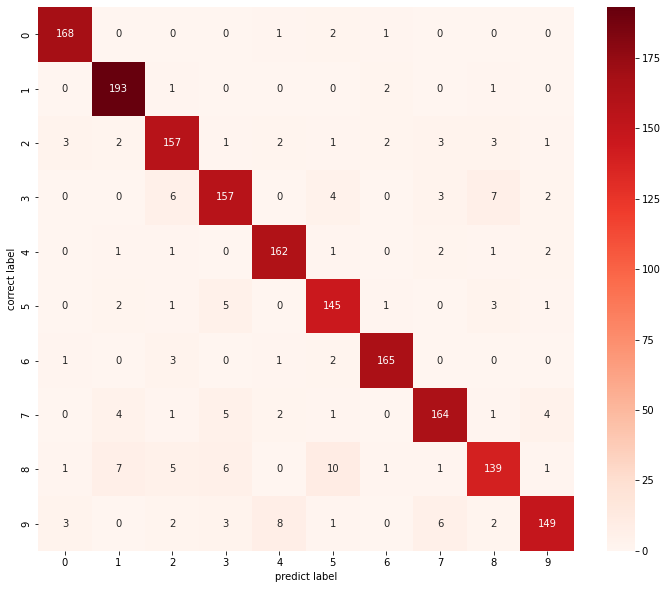

In [6]:
# 各数字の予測精度を確認
_p = predict_test.tolist()
for j in range(10):
    n = 0
    c = 0
    for i in range(len(_p)):
        if j == y_test[i]:
            n = n + 1
            if j == _p[i]:
                c = c + 1
    print(f'{j} : total {n} correct {c} precistion {c/n}')

# 混同行列を作成して、正解を横軸、予測を縦軸としてヒートマップを作成
from sklearn.metrics import confusion_matrix
conf_mat = confusion_matrix(y_test, _p) 
plt.figure(figsize = (12, 10))
sns.heatmap(conf_mat, annot=True, fmt='d', cmap="Reds")
plt.ylabel('correct label')
plt.xlabel('predict label')
plt.show()

In [9]:
# svm (kernel="rbf", C=1) のモデルを学習データを利用して学習
clf = svm.SVC(kernel="rbf", C=1, max_iter=1000, verbose=True, random_state=1)
clf = clf.fit(x_train, y_train)  # * y_trainの列指定はwarning回避のため *

# 学習したモデルの性能(正答率)を学習用データで評価
predict_train = clf.predict(x_train)
print('svm (kernel="rbf", C=1, train data) : accuracy_score', metrics.accuracy_score(y_train, predict_train))

# 学習したモデルの性能(正答率)を検証用データで評価
predict_test = clf.predict(x_test)
print('svm (kernel="rbf", C=1, test data) : accuracy_score', metrics.accuracy_score(y_test, predict_test))

[LibSVM]svm (kernel="rbf", C=1, train data) : accuracy_score 0.9855238095238095
svm (kernel="rbf", C=1, test data) : accuracy_score 0.9274285714285714


0 : total 172 correct 165 precistion 0.9593023255813954
1 : total 197 correct 193 precistion 0.9796954314720813
2 : total 175 correct 169 precistion 0.9657142857142857
3 : total 179 correct 163 precistion 0.9106145251396648
4 : total 170 correct 161 precistion 0.9470588235294117
5 : total 158 correct 147 precistion 0.930379746835443
6 : total 172 correct 161 precistion 0.936046511627907
7 : total 182 correct 165 precistion 0.9065934065934066
8 : total 171 correct 146 precistion 0.8538011695906432
9 : total 174 correct 153 precistion 0.8793103448275862


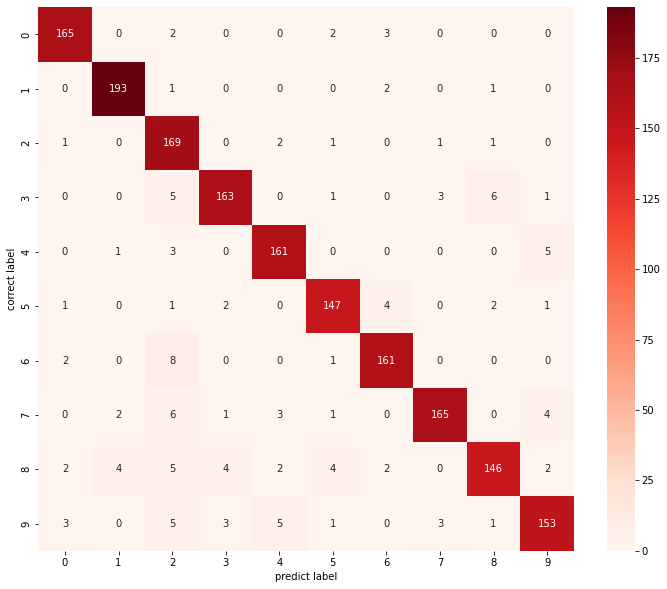

In [8]:
# 各数字の予測精度を確認
_p = predict_test.tolist()
for j in range(10):
    n = 0
    c = 0
    for i in range(len(_p)):
        if j == y_test[i]:
            n = n + 1
            if j == _p[i]:
                c = c + 1
    print(f'{j} : total {n} correct {c} precistion {c/n}')

# 混同行列を作成して、正解を横軸、予測を縦軸としてヒートマップを作成
from sklearn.metrics import confusion_matrix
conf_mat = confusion_matrix(y_test, _p) 
plt.figure(figsize = (12, 10))
sns.heatmap(conf_mat, annot=True, fmt='d', cmap="Reds")
plt.ylabel('correct label')
plt.xlabel('predict label')
plt.show()